Ex 12.6 on page 512. You can get lots of help in chapter slides 12_03.01.ipynb and 12_03.02.ipynb. 

# 12.6 (WORD FREQUENCY BAR CHART AND WORD CLOUD FROM SHAKESPEARE’S HAMLET) 
Using the techniques you learned in this chapter, create a top-20 word frequency bar chart and a word cloud, based on Shakespeare’s Hamlet. Use the mask_oval.png file provided in the ch12 examples folder as the mask.

## Reguired NLTK Libaries

In [23]:
import nltk
from nltk.corpus import stopwords
# Download the list of stopwords
# These are common words like "the", "is", "in", etc., that are often removed in text processing
nltk.download('stopwords')

# Ex:
# stopwords = stopwords.words('english')
# print(stopwords[:10])  # Print the first 10 stopwords
# output: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

# Download the WordNet corpus
# This is a large lexical database of English words
# related to synonyms, antonyms, and other semantic relations
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Ex:
# lemmatizer = WordNetLemmatizer()
# print(lemmatizer.lemmatize("running"))  # Output: run
# print(lemmatizer.lemmatize("better", pos='a'))  # Output: good

# Download the punkt tokenizer models
# splits text into a list of sentences or words
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# Ex:
# text = "Hello there! How are you doing today? Let's learn some NLP."
# print(sent_tokenize(text))  # Output: ['Hello there!', 'How are you doing today?', "Let's learn some NLP."]
# print(word_tokenize(text))  # Output: ['Hello', 'there', '!', ' How', 'are', 'you', 'doing', 'today', '?', 'Let', "'s", 'learn', 'some', 'NLP', '.']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12516\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12516\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12516\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the Data


In [24]:
# imports the imageio library, which is used to read and write images in many formats.
import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

Hamlet = response.text


## Create TextBlob Object

In [29]:
from textblob import TextBlob
# Imports the TextBlob library, which provides a simple interface for text processing tasks 
# such as tokenization, part-of-speech tagging, sentiment analysis, spelling correction, and more.
blob = TextBlob(Hamlet)

#Creates a TextBlob object called blob using the variable data (the text of the book you downloaded).

# blob now provides easy access to many NLP features.

## Getting the Word Frequencies and Eliminating the Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

words = blob.word_counts.items()
words = dict(words) 

filtered_words = {word: count for word, count in words.items() if word not in stop_words}
print(list(filtered_words.items())[:10])

[('project', 38), ('gutenberg', 23), ('etext', 33), ('shakespeare', 11), ('first', 27), ('folio', 7), ('tragedie', 9), ('hamlet', 106), ('ebook', 2), ('one', 57)]


## Sorting the words by Frequency

In [32]:
from operator import itemgetter

sorted_words = sorted(filtered_words.items(), key=itemgetter(1), reverse=True)

## Getting the Top20 words

In [33]:
Top20 = sorted_words[:20]
print(Top20)

[('ham', 337), ('lord', 211), ('haue', 175), ('king', 173), ('shall', 107), ('hamlet', 106), ('come', 106), ('thou', 105), ('let', 104), ('good', 99), ('hor', 95), ('thy', 90), ('may', 85), ('enter', 85), ('oh', 81), ('like', 79), ('well', 71), ('know', 70), ('would', 69), ('selfe', 68)]


## Convert the Top20 words into a dataframe

In [34]:
import pandas as pd

df = pd.DataFrame(Top20, columns=['Word', 'Frequency'])
print(df)

      Word  Frequency
0      ham        337
1     lord        211
2     haue        175
3     king        173
4    shall        107
5   hamlet        106
6     come        106
7     thou        105
8      let        104
9     good         99
10     hor         95
11     thy         90
12     may         85
13   enter         85
14      oh         81
15    like         79
16    well         71
17    know         70
18   would         69
19   selfe         68


## Visualize the Data

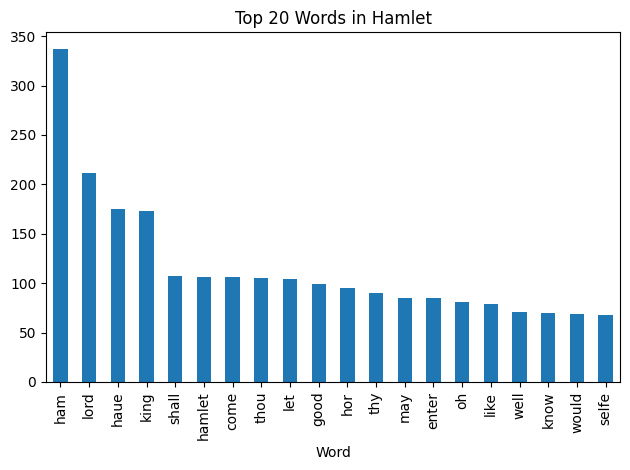

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
axes = df.plot.bar(x='Word', y='Frequency', legend=False, title="Top 20 Words in Hamlet")

plt.gcf().tight_layout()

In [ ]:
from wordcloud import WordCloud# Load mask image
import imageio

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image = imageio.imread(image_file)

wordcloud = WordCloud( background_color='white', mask=mask_image)
wordcloud = wordcloud.generate(Hamlet)
plt.imshow(wordcloud, interpolation='bilinear')

wordcloud = wordcloud.to_file('Hamlet.png')

C:\Users\12516\AppData\Local\Temp\ipykernel_25700\1654715092.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)
